In [1]:
#Imported all require libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

In [2]:
# read csv dataset as dataframe
df = pd.read_csv('cryptos.csv')
df

,Unnamed: 0,Crypto,Date,Open,High,Low,Close,Volume,Market Cap
0,0,Binance,28-02-2021,225.445941,228.173046,195.852670,209.574404,3.129699e+09,3.238612e+10
1,1,Binance,27-02-2021,221.980905,237.179435,220.099401,225.249443,2.755271e+09,3.480842e+10
2,2,Binance,26-02-2021,235.270287,238.755012,210.310761,221.680429,4.167146e+09,3.425689e+10
3,3,Binance,25-02-2021,254.467606,264.705134,233.885956,233.885956,4.059853e+09,3.614305e+10
4,4,Binance,24-02-2021,231.121604,280.088196,214.524714,254.359132,7.154122e+09,3.930683e+10
...,...,...,...,...,...,...,...,...,...
19126,2761,XRP,08-08-2013,0.004397,0.004424,0.004175,0.004254,0.000000e+00,3.325863e+07
19127,2762,XRP,07-08-2013,0.004669,0.004682,0.004333,0.004417,0.000000e+00,3.453412e+07
19128,2763,XRP,06-08-2013,0.005637,0.005661,0.004629,0.004680,0.000000e+00,3.659101e+07
19129,2764,XRP,05-08-2013,0.005875,0.005980,0.005613,0.005613,0.000000e+00,4.387916e+07


In [3]:
#change the date format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
specific_date = '2017-09-30 00:00:00'  

In [5]:
# filter the dataset with date 
df = df[df['Date'] > specific_date]

In [6]:
# columns of the dataset
df = df[['Date','Crypto', 'Open', 'High', 'Low', 'Close', 'Volume','Market Cap']]

In [7]:
df

,Date,Crypto,Open,High,Low,Close,Volume,Market Cap
0,2021-02-28,Binance,225.445941,228.173046,195.852670,209.574404,3.129699e+09,3.238612e+10
1,2021-02-27,Binance,221.980905,237.179435,220.099401,225.249443,2.755271e+09,3.480842e+10
2,2021-02-26,Binance,235.270287,238.755012,210.310761,221.680429,4.167146e+09,3.425689e+10
3,2021-02-25,Binance,254.467606,264.705134,233.885956,233.885956,4.059853e+09,3.614305e+10
4,2021-02-24,Binance,231.121604,280.088196,214.524714,254.359132,7.154122e+09,3.930683e+10
...,...,...,...,...,...,...,...,...
17607,2017-10-05,XRP,0.215583,0.241023,0.215583,0.237016,4.042990e+08,9.088104e+09
17608,2017-10-04,XRP,0.203218,0.217024,0.202647,0.214774,1.235730e+08,8.235260e+09
17609,2017-10-03,XRP,0.203209,0.204808,0.198730,0.203318,4.870310e+07,7.795993e+09
17610,2017-10-02,XRP,0.206077,0.206556,0.199444,0.202676,7.741230e+07,7.771376e+09


In [8]:
# Convert string crypto into numeric data
le = preprocessing.LabelEncoder()
df['Crypto'] = le.fit_transform(df['Crypto'])

In [9]:
open_mean = df['Open']
close_mean = df['Close']
high_mean = df['High']
low_mean = df['Low']

In [10]:
#The percentage of open-close mean 
open_close = (open_mean/close_mean * 100) - 100

In [11]:
# The percentage of high and low mean
high_low = (high_mean/low_mean * 100) - 100

In [12]:
# Create a new dataframe
new_df = df[['Date','Crypto', 'Volume','Market Cap']]
# rename the Market Cap column as MarketCap
new_df = new_df.rename(columns = {"Market Cap": "MarketCap"})

In [13]:
# Add Open-close and high-low percentage columns to the new_df dataframe
new_df['OpenClose'] = open_close
new_df['HighLow'] = high_low

In [14]:
#Contains all unique dates 
dates = new_df['Date'].unique()

In [15]:
# create a new dataframe check
check = pd.DataFrame()

In [16]:
# Compute the percentage of Marketcap and Volume and add that data to the check dataframe
for i in range(len(dates)):
    data = new_df[new_df['Date'] == dates[i]]
    # sum of the marketcap and volume
    sum_mc = np.sum(data['MarketCap'])
    sum_vol = np.sum(data['Volume'])
    
    #data['VM Ratio'] = data['Volume'] / data['Market Cap']
    # percentage of marketcap and volume
    data['MarketCap'] = data['MarketCap'] / sum_mc * 100
    data['Volume'] = data['Volume'] / sum_vol * 100
    
    check = pd.concat([check, data])

In [17]:
check

,Date,Crypto,Volume,MarketCap,OpenClose,HighLow
0,2021-02-28,0,1.389866,2.716893,7.573223,16.502392
1315,2021-02-28,1,23.733861,70.588028,2.340049,8.035806
4179,2021-02-28,2,6.986660,3.414095,1.189515,16.724383
5426,2021-02-28,3,0.896995,0.848326,6.364030,15.942324
6684,2021-02-28,4,12.273309,13.644850,3.093928,12.912187
...,...,...,...,...,...,...
7930,2017-10-01,4,16.644267,25.264011,-0.261301,2.756036
9963,2017-10-01,5,5.445965,2.554226,1.087025,2.865071
13020,2017-10-01,7,0.083407,0.199908,0.913177,3.598702
15420,2017-10-01,8,5.599478,0.384778,-0.265821,0.721311


In [18]:
# group check dataframe by crypto
group_crypto = check.groupby('Crypto')

In [19]:
# Compute the mean of OpenClose, HighLow, MarketCap, Volume columns of the group_crypto dataframe 
crypto_oc = group_crypto['OpenClose'].agg(np.mean)
#crypto_close = group_crypto['Close'].agg(np.mean)
crypto_hl = group_crypto['HighLow'].agg(np.mean)
#crypto_low = group_crypto['Low'].agg(np.mean)
crypto_mc = group_crypto['MarketCap'].agg(np.mean)
crypto_vol = group_crypto['Volume'].agg(np.mean)
#crypto_vm = group_crypto['VM Ratio'].agg(np.mean)

In [20]:
# create a new dataframe for all the mean values
group_df = pd.DataFrame()
group_df['Cryptos'] = check['Crypto'].unique()
group_df['OpenClose'] = crypto_oc
group_df['HighLow'] = crypto_hl
group_df['MarketCap'] = crypto_mc
group_df['Volume'] = crypto_vol
#group_df['VM Ratio'] = crypto_vm

In [21]:
#The group_df dataframe contains 10 rows, each row refers to each crypto currency data.
binance, bitcoin, cardano, chainLink, ethereum, liteCoin, polkadots, stellar, tether, xrp = [], [], [], [], [], [], [], [], [], []
for i in range(len(group_df.columns)):
    binance.append(group_df.iloc[0,i])
    bitcoin.append(group_df.iloc[1,i])
    cardano.append(group_df.iloc[2,i])
    chainLink.append(group_df.iloc[3,i])
    ethereum.append(group_df.iloc[4,i])
    liteCoin.append(group_df.iloc[5,i])
    polkadots.append(group_df.iloc[6,i])
    stellar.append(group_df.iloc[7,i])
    tether.append(group_df.iloc[8,i])
    xrp.append(group_df.iloc[9,i])
group_df

,Cryptos,OpenClose,HighLow,MarketCap,Volume
0,0,-0.155370,8.359344,1.071488,0.458698
1,1,-0.095923,5.240957,69.258139,40.248561
2,2,-0.068914,9.769008,1.255743,0.624465
3,3,-0.013277,11.815212,0.416654,0.407971
4,4,0.027188,6.739537,14.808482,15.635820
5,5,0.082176,7.558739,2.099740,4.438660
6,6,-0.945874,11.859125,1.220109,0.819865
7,7,-0.016895,9.442883,1.271531,0.604632
8,8,-0.001160,1.649235,2.132482,33.630384
9,9,0.151228,7.894376,7.496903,3.823917


In [22]:
# transfrom cryptos as columns and attributes as rows
group_df_rev = pd.DataFrame({
    "Binance": [binance[1], binance[2], binance[3], binance[4]],
    "Bitcoin": [bitcoin[1], bitcoin[2], bitcoin[3], bitcoin[4]],
    "Cardano": [cardano[1], cardano[2], cardano[3], cardano[4]],
    "ChainLink": [chainLink[1], chainLink[2], chainLink[3], chainLink[4]],
    "Ethereum": [ethereum[1], ethereum[2], ethereum[3], ethereum[4]],
    "Litecoin": [liteCoin[1], liteCoin[2], liteCoin[3], liteCoin[4]],
    "Polkadot": [polkadots[1], polkadots[2], polkadots[3], polkadots[4]],
    "Stellar": [stellar[1], stellar[2], stellar[3], stellar[4]],
    "Tether": [tether[1], tether[2], tether[3], tether[4]],
    "XRP": [xrp[1], xrp[2], xrp[3], xrp[4]]
})

group_df_rev.rename(index={0: 'OpenClose', 1: 'HighLow', 2:'MarketCap', 3:'Volume'})

,Binance,Bitcoin,Cardano,ChainLink,Ethereum,Litecoin,Polkadot,Stellar,Tether,XRP
OpenClose,-0.155370,-0.095923,-0.068914,-0.013277,0.027188,0.082176,-0.945874,-0.016895,-0.001160,0.151228
HighLow,8.359344,5.240957,9.769008,11.815212,6.739537,7.558739,11.859125,9.442883,1.649235,7.894376
MarketCap,1.071488,69.258139,1.255743,0.416654,14.808482,2.099740,1.220109,1.271531,2.132482,7.496903
Volume,0.458698,40.248561,0.624465,0.407971,15.635820,4.438660,0.819865,0.604632,33.630384,3.823917


In [23]:
# List of cyptos
cryptos = ['Binance', 'Bitcoin', 'Cardano', 'ChainLink', 'Ethereum', 'Litecoin', 'Polkadot', 'Stellar', 'Tether', 'XRP']
#df1 = final_df[final_df['Date'] > '2020-03-20 00:00:00']
x = check['Date'].unique()

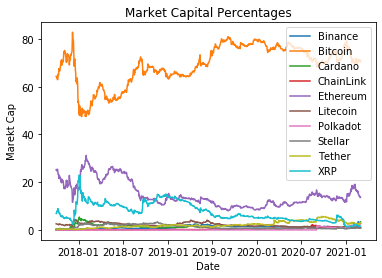

In [24]:
# The graph between market capital percentage and the date with respect to all crypto currencies.
#for i in range(2, len(cryptos)):
for i in range(0, len(cryptos)):
    plt_data = check[check['Crypto'] == i]
    y = plt_data['MarketCap']
    j = len(y)
    
    while j != len(x):
        y[j] = np.min(plt_data['MarketCap'])
        j += 1
    
    plt.plot(x, y, label = cryptos[i])

plt.xlabel('Date')
plt.ylabel('Marekt Cap')
plt.title('Market Capital Percentages')
plt.legend()
plt.rcParams["figure.figsize"] = (20, 25)
plt.show()

In [25]:
group_df

,Cryptos,OpenClose,HighLow,MarketCap,Volume
0,0,-0.155370,8.359344,1.071488,0.458698
1,1,-0.095923,5.240957,69.258139,40.248561
2,2,-0.068914,9.769008,1.255743,0.624465
3,3,-0.013277,11.815212,0.416654,0.407971
4,4,0.027188,6.739537,14.808482,15.635820
5,5,0.082176,7.558739,2.099740,4.438660
6,6,-0.945874,11.859125,1.220109,0.819865
7,7,-0.016895,9.442883,1.271531,0.604632
8,8,-0.001160,1.649235,2.132482,33.630384
9,9,0.151228,7.894376,7.496903,3.823917


In [26]:
group_df_rev

,Binance,Bitcoin,Cardano,ChainLink,Ethereum,Litecoin,Polkadot,Stellar,Tether,XRP
0,-0.155370,-0.095923,-0.068914,-0.013277,0.027188,0.082176,-0.945874,-0.016895,-0.001160,0.151228
1,8.359344,5.240957,9.769008,11.815212,6.739537,7.558739,11.859125,9.442883,1.649235,7.894376
2,1.071488,69.258139,1.255743,0.416654,14.808482,2.099740,1.220109,1.271531,2.132482,7.496903
3,0.458698,40.248561,0.624465,0.407971,15.635820,4.438660,0.819865,0.604632,33.630384,3.823917


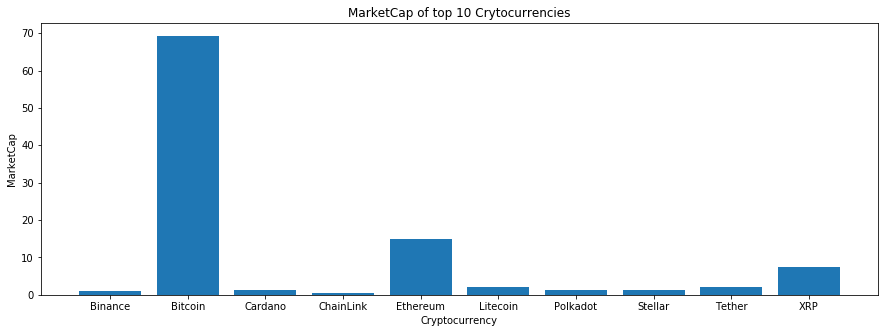

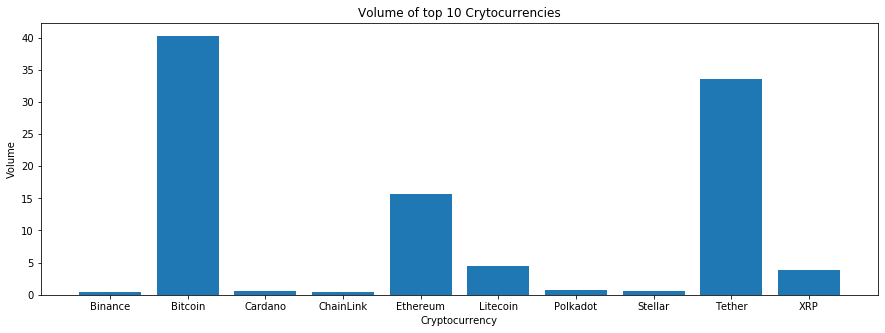

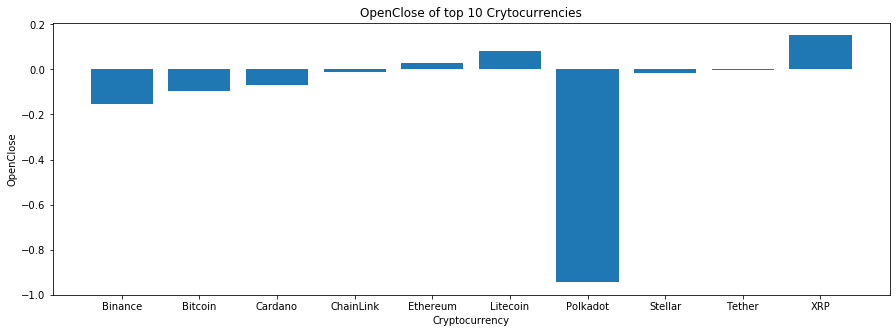

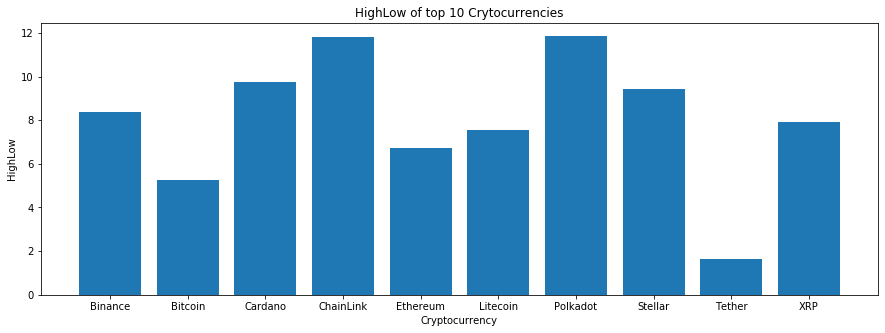

In [50]:
strings = ['MarketCap', 'Volume', 'OpenClose', 'HighLow']
# The plot between 'Market cap', 'Volume', 'OpenClose' and Highlow aganist top 10 cryptocurrencies
for i in range(len(group_df.columns) - 1):
    string = strings[i] + ' of top 10 Crytocurrencies'
    plt.rcParams["figure.figsize"] = (15, 5)
    plt.bar(cryptos, group_df[strings[i]])
    plt.title(string)
    plt.xlabel('Cryptocurrency')
    plt.ylabel(strings[i])
    plt.show()

In [28]:
# The correlation matrix of different crypto currencies
cor_matrix = group_df_rev.corr()
cor_matrix

,Binance,Bitcoin,Cardano,ChainLink,Ethereum,Litecoin,Polkadot,Stellar,Tether,XRP
Binance,1.000000,-0.367686,0.999958,0.995283,-0.126966,0.858257,0.998124,0.999969,-0.307458,0.661161
Bitcoin,-0.367686,1.000000,-0.375424,-0.453082,0.869217,-0.136627,-0.337897,-0.374770,0.277343,0.451842
Cardano,0.999958,-0.375424,1.000000,0.996119,-0.132606,0.858449,0.998024,0.999984,-0.305318,0.654646
ChainLink,0.995283,-0.453082,0.996119,1.000000,-0.197943,0.848151,0.991808,0.995922,-0.299037,0.586352
Ethereum,-0.126966,0.869217,-0.132606,-0.197943,1.000000,0.274827,-0.075425,-0.134525,0.615074,0.547160
Litecoin,0.858257,-0.136627,0.858449,0.848151,0.274827,1.000000,0.887706,0.855900,0.214981,0.679589
Polkadot,0.998124,-0.337897,0.998024,0.991808,-0.075425,0.887706,1.000000,0.997759,-0.252148,0.679803
Stellar,0.999969,-0.374770,0.999984,0.995922,-0.134525,0.855900,0.997759,1.000000,-0.310493,0.655559
Tether,-0.307458,0.277343,-0.305318,-0.299037,0.615074,0.214981,-0.252148,-0.310493,1.000000,-0.133458
XRP,0.661161,0.451842,0.654646,0.586352,0.547160,0.679589,0.679803,0.655559,-0.133458,1.000000


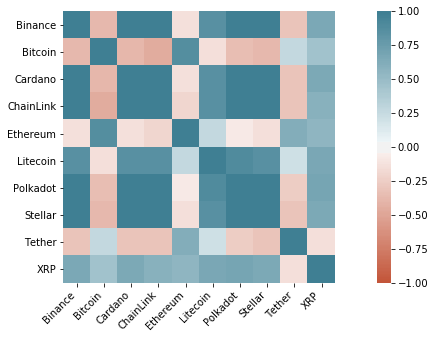

In [29]:
# The visualization of cryptocurrencies correlation matrix
heat_corr = sns.heatmap(
                        cor_matrix,
                        vmin = -1,
                        vmax = 1,
                        center = 0,
                        cmap = sns.diverging_palette(20,220,n=200),
                        square = True)

heat_corr.set_xticklabels(heat_corr.get_xticklabels(),
                         rotation = 45,
                         horizontalalignment = 'right'
                         );
#NOTE: The dark color represents the high correlation between two cryptos and light color represents the less/no correlation between cryptos.

In [30]:
features = check.columns

print("R-Squared values")
print("--------------------")

for i in range(len(features)):
    if features[i] != 'MarketCap':
        x = "MarketCap ~ " + features[i]
        market_cap = sm.ols(formula = x, data = check).fit()
        print(features[i], ": ", np.round(market_cap.rsquared * 100))

R-Squared values
--------------------
Date :  0.0
Crypto :  12.0
Volume :  46.0
OpenClose :  0.0
HighLow :  1.0


In [31]:
features = group_df_rev.columns

print("R-Squared values")
print("--------------------")

for i in range(len(features)):
    if features[i] != 'Bitcoin':
        x = "Bitcoin ~ " + features[i]
        btc = sm.ols(formula = x, data = group_df_rev).fit()
        print(features[i], ": ", np.round(btc.rsquared * 100))

R-Squared values
--------------------
Binance :  14.0
Cardano :  14.0
ChainLink :  21.0
Ethereum :  76.0
Litecoin :  2.0
Polkadot :  11.0
Stellar :  14.0
Tether :  8.0
XRP :  20.0


In [32]:
# fit the linear regression model to observe how ethereum values effects bitcoin values
# The linear regression model is Bitcoin = beta_0 + beta_1*Ethereum
single_model = sm.ols(formula = "Bitcoin ~ Ethereum", data = group_df_rev).fit()
single_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Bitcoin   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     6.181
Date:                Tue, 23 Mar 2021   Prob (F-statistic):              0.131
Time:                        18:22:34   Log-Likelihood:                -16.201
No. Observations:                   4   AIC:                             36.40
Df Residuals:                       2   BIC:                             35.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9253     17.361     -0.399      0.729     -81.623      67.772
Ethereum       3.8256      1.539      2.486      0.131      -2.795      10.446
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.300
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.490
Skew:                           0.299   Prob(JB):                        0.783
Kurtosis:                       1.393   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model_data = group_df_rev[['Binance', 'Bitcoin', 'Cardano', 'ChainLink', 'Ethereum', 'Litecoin', 'Polkadot', 'Stellar', 'Tether', 'XRP']]
# fit the linear regression model to observe how ethereum and chainlink values effects bitcoin values
#The linear regression model is Bitcoin = beta_0 + beta_1* Ethereum + beta_2*ChainLink
multi_model = sm.ols(formula = "Bitcoin ~ Ethereum + ChainLink", data = model_data).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Bitcoin   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     2.581
Date:                Tue, 23 Mar 2021   Prob (F-statistic):              0.403
Time:                        18:22:34   Log-Likelihood:                -15.381
No. Observations:                   4   AIC:                             36.76
Df Residuals:                       1   BIC:                             34.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6313     22.646      0.028      0.982    -287.113     288.375
Ethereum       3.5707      1.809      1.974      0.298     -19.411      26.552
ChainLink     -1.6430      2.308     -0.712      0.606     -30.974      27.688
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.527
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.176
Skew:                           0.118   Prob(JB):                        0.916
Kurtosis:                       2.001   Cond. No.                         23.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#check['Date'] = check['Date'].map(dt.datetime.toordinal)
# Convert date values into numeric
check['Date'] = le.fit_transform(check['Date'])

In [35]:
x = check[['Date', 'Crypto', 'Volume', 'OpenClose', 'HighLow']]
y = check['MarketCap']

In [36]:
# Split the dataset into the train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [37]:
# Fit the regression model on training set and test the data on testing set
model_LR = LinearRegression().fit(x_train, y_train)
y_pred_LR = model_LR.predict(x_test)

intercept_LR = model_LR.intercept_
coef_LR = model_LR.coef_
# accuracy of train and test set
score_train_LR = model_LR.score(x_train, y_train)
score_test_LR = model_LR.score(x_test, y_test)

In [38]:
print('Linear Regression Results: ')
print('---------------------------------------')
#print('Intercept: ', intercept_LR)
#print('---------------------------------------')
#print('Coefficients: ')
#for i in range(len(x.columns)):
#    print('   ', x.columns[i], ': ', coef_LR[i])
#print('---------------------------------------')
print('Train score: ', score_train_LR)
print('---------------------------------------')
print('Test score: ', score_test_LR)

Linear Regression Results: 
---------------------------------------
Train score:  0.5791075067254641
---------------------------------------
Test score:  0.5665887292217284


In [39]:
# fit the gradient boosting regression model on train set 
model_GBR = GradientBoostingRegressor().fit(x_train, y_train)
# predict values on test set
y_pred_GBR = model_GBR.predict(x_test)
# compute the accuracy of train and test set
score_train_GBR = model_GBR.score(x_train, y_train)
score_test_GBR = model_GBR.score(x_test, y_test)

In [40]:
print('Gradient Boosting Regression Results: ')
print('---------------------------------------')
print('Train score: ', score_train_GBR)
print('---------------------------------------')
print('Test score: ', score_test_GBR)

Gradient Boosting Regression Results: 
---------------------------------------
Train score:  0.9956140852984579
---------------------------------------
Test score:  0.9942612542935998


In [41]:
# fit random forest regression model on train set
model_RFR = RandomForestRegressor().fit(x_train, y_train)
# predict the value on test set
y_pred_RFR = model_RFR.predict(x_test)
# compute the accuracy of train and test set
score_train_RFR = model_RFR.score(x_train, y_train)
score_test_RFR = model_RFR.score(x_test, y_test)

In [42]:
print('Random Forest Regression Results: ')
print('---------------------------------------')
print('Train score: ', score_train_RFR)
print('---------------------------------------')
print('Test score: ', score_test_RFR)

Random Forest Regression Results: 
---------------------------------------
Train score:  0.9998353667357801
---------------------------------------
Test score:  0.9992934497549818


In [43]:
# fit ridge regression model on train set
model_R1 = Ridge(alpha = 10, fit_intercept = True)
model_R = model_R1.fit(x_train, y_train)
# compute the accuarcy of train and test set
score_train_R = model_R.score(x_train, y_train)
score_test_R = model_R.score(x_test, y_test)

In [44]:
print('Ridge Regression Results: ')
print('---------------------------------------')
# print the percentage of accuracy
print('Train score: ', score_train_R * 100)
print('---------------------------------------')
print('Test score: ', score_test_R * 100)

Ridge Regression Results: 
---------------------------------------
Train score:  57.910750402670466
---------------------------------------
Test score:  56.659016044947165


In [45]:
# fit the Lasso regression model on training set
model_L1 = Lasso(alpha = 10, max_iter = 100000, fit_intercept = True)
model_L = model_L1.fit(x_train, y_train)
# compute the accuracy of the train and test set
score_train_L = model_L.score(x_train, y_train)
score_test_L = model_L.score(x_test, y_test)

In [46]:
print('Lasso Regression Results: ')
print('---------------------------------------')
print('Train score: ', score_train_L * 100)
print('---------------------------------------')
print('Test score: ', score_test_L * 100)

Lasso Regression Results: 
---------------------------------------
Train score:  55.27428328604924
---------------------------------------
Test score:  54.4301391981779


In [47]:
# Compare all acurracies of train and test sets of different regression models
indices = ['LR', 'GBR', 'RFR', 'R', 'L']
test_scores = [score_test_LR, score_test_GBR, score_test_RFR, score_test_R, score_test_L]
train_scores = [score_train_LR, score_train_GBR, score_train_RFR, score_train_R, score_train_L]

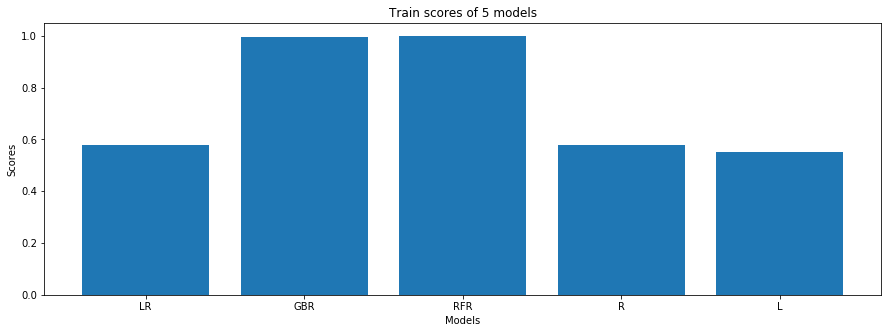

In [48]:
# Plot the train score of different regression models
plt.bar(indices, train_scores)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train scores of 5 models')
plt.show()

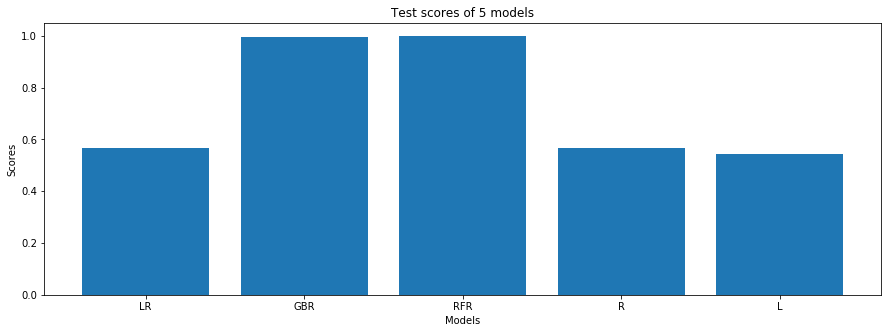

In [49]:
# Plot the test scores of different regression models
plt.bar(indices, test_scores)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Test scores of 5 models')
plt.show()